In [6]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:

def load_origin_graph(file_name,gap):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name,gap):
    
    path = "../Generated_graphs/ETNgen-"+file_name+".dat"
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

def load_tag_graph_callsms(file_name,gap):
    path = "../Competitors_generated_graphs/TagGen/"+file_name+"_599_generato_TagGen.dat"
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)

    return graphs_in
def load_tag_graph(file_name,gap):
    path = "../Competitors_generated_graphs/TagGen/"+file_name+"_generato_TagGen.dat"
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)

    return graphs_in

In [8]:
import os 

In [9]:

file_name = "High_School12"
#file_name = "High_School13"
#file_name = "primary_school"

#file_name = "DTU_calls_1sett"
#file_name = "DTU_SMS_1sett"

#file_name = "FF_calls_1sett"
#file_name = "FF_SMS_1sett"



gap = 299
orig_graphs = load_origin_graph(file_name,gap)
etn_gen = load_ETNgen_graph(file_name,gap)
#tag_gen = load_tag_graph_callsms(file_name,gap=0)
tag_gen = load_tag_graph(file_name,0)

In [10]:
print(len(orig_graphs),len(etn_gen),len(tag_gen))

2432 2433 2432


In [11]:
start = 280 #hs12
#start = 243 #hs13
#start = 283 #ps

#start = 182 # dtu calls
#start = 220#ff sms

In [12]:
import os

path = "dynamic_results/SI/"+file_name
COV = path+"/coverage_2picco"
MFPTs = path+"/MFPT_2picco"

if not os.path.exists(path):
    os.makedirs(path)
    
if not os.path.exists(COV):
    os.makedirs(COV)
if not os.path.exists(MFPTs):
    os.makedirs(MFPTs)

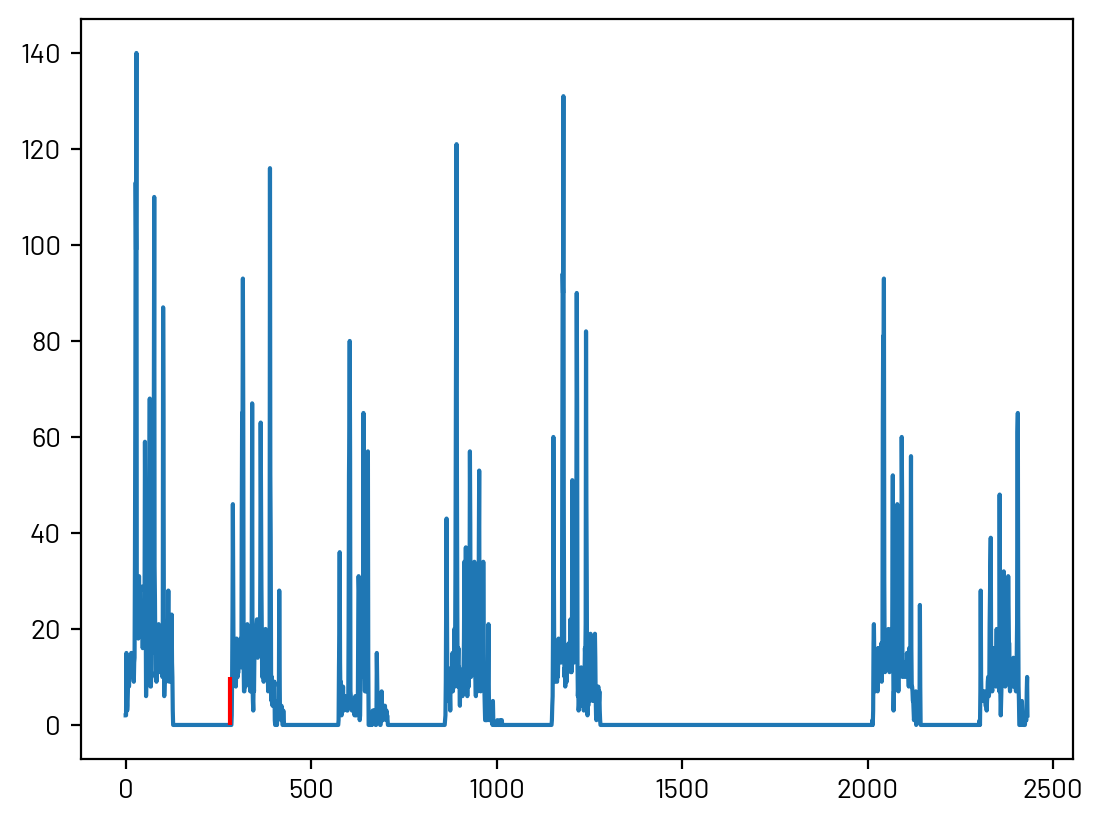

In [13]:
n = []
for g in orig_graphs:
    n.append(len(g.edges()))
    
plt.plot(n)
plt.vlines(start,0,10,color="red")

In [14]:
len(orig_graphs[0])

180

# coverage

k volte, con n0 e t0 random

In [795]:
from scipy.stats import ks_2samp

In [796]:
K = 1000
T = 50
c_mio,c_tag = [],[]

c_orig = ds.coverage(orig_graphs[start:],K,T)
c_stab = ds.coverage(orig_graphs[start:],K,T)
for etn in [etn_gen]:
    c_mio.append(ds.coverage(etn[start:],K,T))
print("ETN done")
for tag in [tag_gen]:
    c_tag.append(ds.coverage(tag[start:],K,T))

ETN done


In [797]:
def mean_ks(c_orig,c_gens):
    res = []
    for i in c_gens:
        res.append(ks_2samp(c_orig,i)[0])
    return np.mean(res),np.std(res)

In [798]:

print("coverage")
print("orig vs sta \t",ks_2samp(c_orig, c_stab)[0])
print("orig vs mio \t",mean_ks(c_orig, c_mio))
print("orig vs tag \t",mean_ks(c_orig, c_tag))

coverage
orig vs sta 	 0.004
orig vs mio 	 (0.152, 0.0)
orig vs tag 	 (0.366, 0.0)


/tmp/ipykernel_11999/535944073.py:2: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  print("orig vs sta \t",ks_2samp(c_orig, c_stab)[0])


In [799]:
COV

'dynamic_results/SI/FF_SMS_1sett/coverage_2picco'

In [800]:
np.save(COV+"/stab",c_stab)
np.save(COV+"/orig",c_orig)
np.save(COV+"/tag",c_tag)
np.save(COV+"/etn",c_mio)

# MFPT

In [801]:
def len_random_walk_MFPT(graphs,t0,n0,n_end):
    RW = []
    for i in range(t0,len(graphs)-1):
        RW.append(n0)
        t0 = t0 + 1
        g0 = graphs[t0]
        neig = list(nx.neighbors(g0,n0))
        if not neig == []:
            n0 = np.random.choice(neig)
            if n0 == n_end:
                return len(RW)
            
    return -1



def MFPT(graphs,K=5):
    nodes = list(graphs[0].nodes())
    res = []
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            t0 = 0
            n0 = nodes[i]
            n_end = nodes[j]
            tmp = []
            for k in range(K):
                t = len_random_walk_MFPT(graphs,t0,n0,n_end)
                #if t == -1:
                    #tmp.append(len(graphs))
                #else:
                    #tmp.append(t)
                if t > 0:
                    tmp.append(t)
            res.extend(tmp)
    return res


In [802]:
path = "dynamic_results/SI/"+file_name
MFPTs = path+"/MFPT_2picco"
MFPTs

'dynamic_results/SI/FF_SMS_1sett/MFPT_2picco'

In [803]:
orig_graphs = load_origin_graph(file_name,gap=599)
etn_gen = load_ETNgen_graph(file_name,gap)
tag_gen = load_tag_graph_callsms(file_name,0)
#tag_gen = load_tag_graph(file_name,0)
print(MFPTs)

dynamic_results/SI/FF_SMS_1sett/MFPT_2picco


In [804]:
print(len(orig_graphs),len(etn_gen),len(tag_gen))

1006 1007 1006


In [805]:
start

220

In [810]:
K = 1
m_ori = MFPT(orig_graphs[start:],K)
#m_ori2 = [x for x in m_ori if x < max(m_ori)-10]
print(1)
m_stb = MFPT(orig_graphs[start:],K)
#m_stb2 = [x for x in m_stb if x < max(m_ori)-10]
print(2)

m_mio,m_tag = [],[]

c = 0
for etn in [etn_gen]:
    c = c + 1
    print("\t",c)
    tmp = MFPT(etn[start:],K)
    #tmp = [x for x in tmp if x < max(m_ori)-10]
    m_mio.append(tmp)
print("ETN done")

c = 0
for tag in [tag_gen]:
    c = c + 1
    print("\t",c)
    tmp = MFPT(tag[start:],K)
    #tmp = [x for x in tmp if x < max(m_ori)-10]
    m_tag.append(tmp)
print("TAG done")

1
2
	 1
ETN done
	 1
TAG done


In [811]:
print("orig vs sta \t",ks_2samp(m_ori, m_stb)[0])
print("orig vs mio \t",mean_ks(m_ori, m_mio))
print("orig vs tag \t",mean_ks(m_ori, m_tag))

orig vs sta 	 0.018867924528301886
orig vs mio 	 (0.34719310505474027, 0.0)
orig vs tag 	 (0.26172428836296213, 0.0)


In [812]:
np.save(MFPTs+"/stab",m_stb)
np.save(MFPTs+"/orig",m_ori)
np.save(MFPTs+"/tag",m_tag)
np.save(MFPTs+"/etn",m_mio)

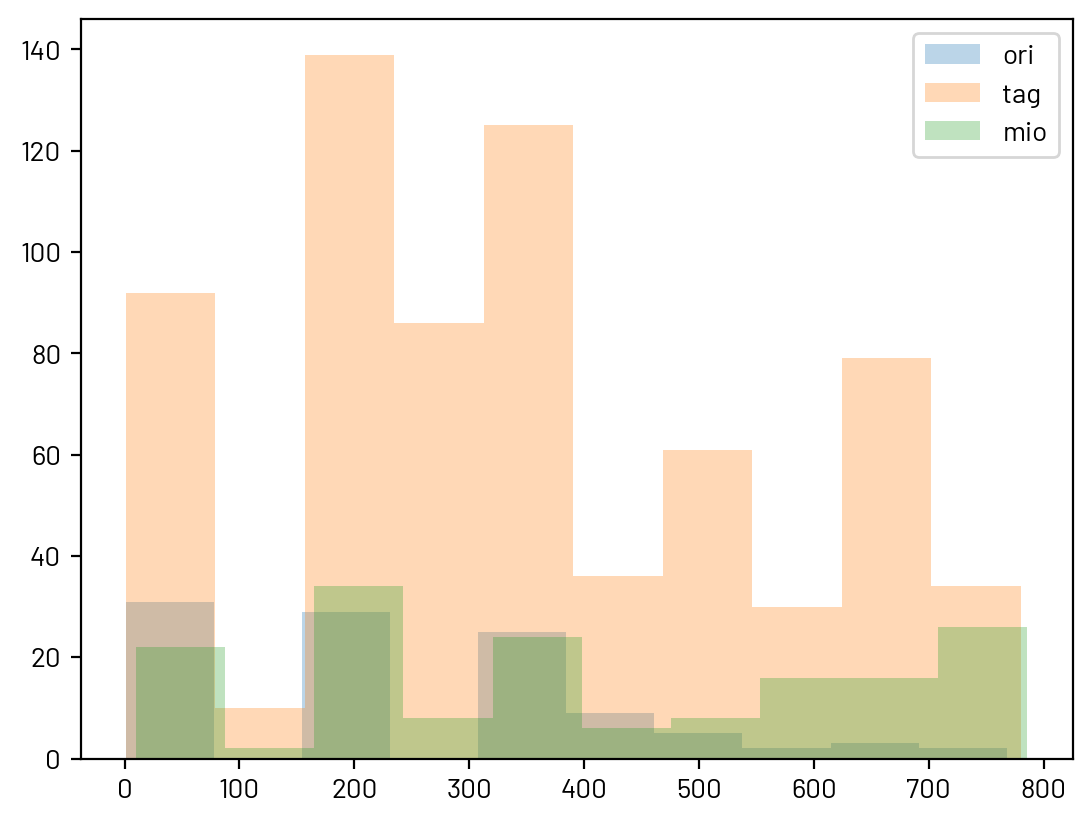

In [813]:
plt.hist(m_ori,label="ori",alpha=0.3)
plt.hist(m_tag,label="tag",alpha=0.3)
plt.hist(m_mio,label="mio",alpha=0.3)
plt.legend()

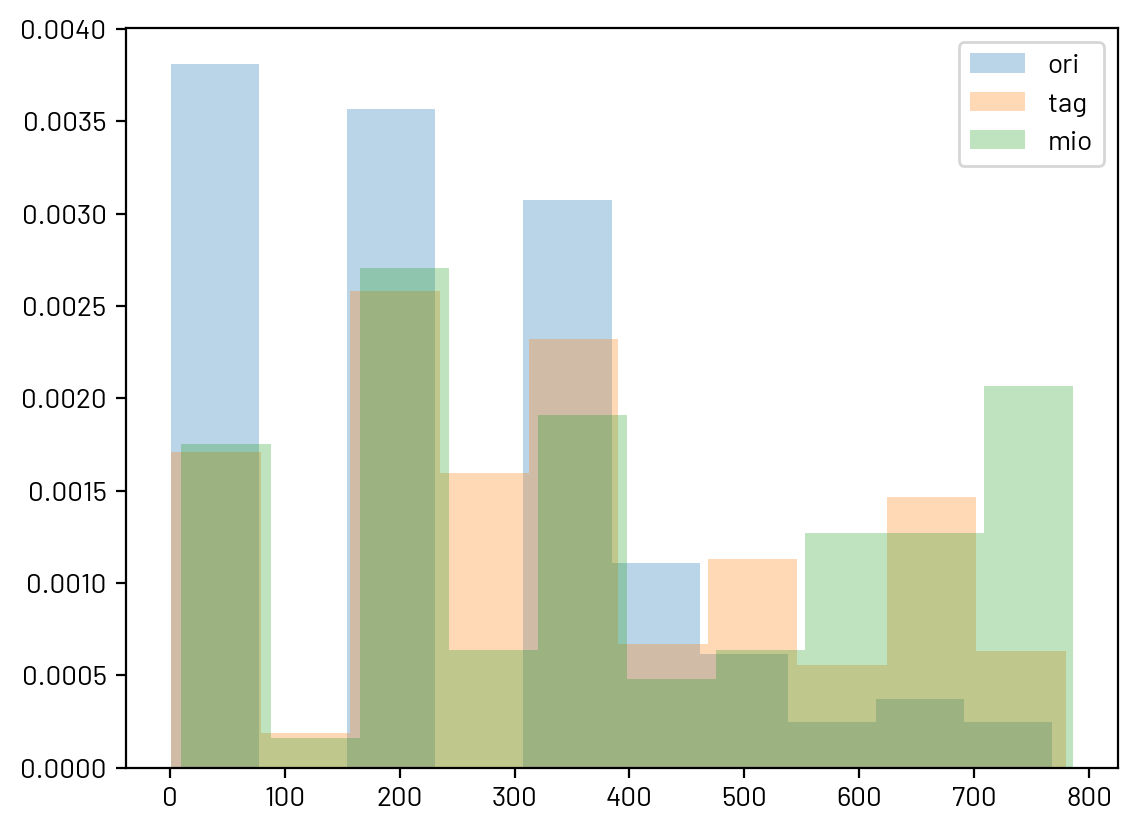

In [814]:
plt.hist(m_ori,label="ori",alpha=0.3,density=True)
plt.hist(m_tag,label="tag",alpha=0.3,density=True)
plt.hist(m_mio,label="mio",alpha=0.3,density=True)
plt.legend()

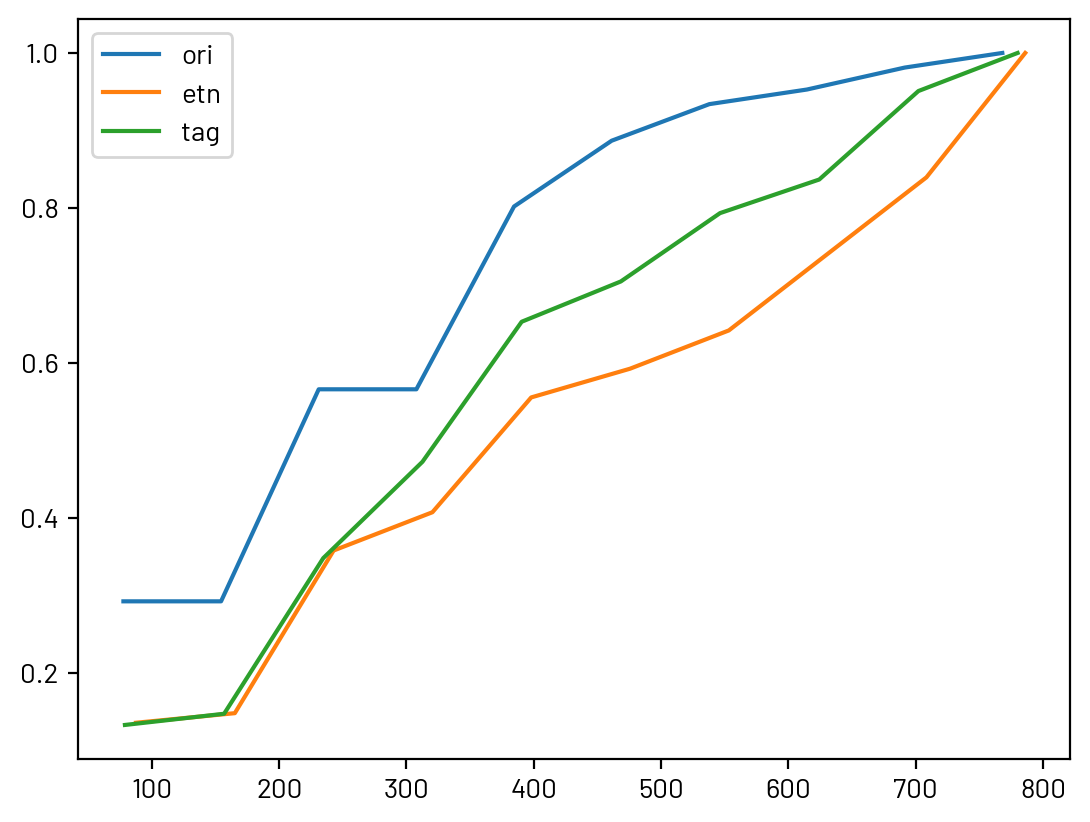

In [815]:
data = m_ori
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="ori")

data = m_mio
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="etn")



data = m_tag
count, bins_count = np.histogram(data, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="tag")

plt.legend()

In [816]:
k1 = np.sort(m_ori)
k2 = np.sort(m_mio)
k3 = np.sort(m_tag)

In [817]:
k3[0]

array([  1,   1,   1,   1,   2,   2,   2,   2,  15,  15,  15,  15,  15,
        15,  15,  15,  19,  19,  19,  19,  19,  32,  32,  32,  33,  33,
        33,  33,  33,  40,  40,  40,  41,  41,  41,  41,  42,  44,  44,
        44,  44,  44,  44,  45,  45,  45,  45,  45,  46,  46,  46,  46,
        46,  46,  47,  47,  47,  47,  47,  47,  48,  48,  48,  49,  49,
        50,  50,  50,  50,  52,  56,  56,  56,  56,  56,  56,  56,  56,
        61,  61,  61,  61,  61,  63,  63,  63,  63,  63,  63,  63,  63,
        63, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 158, 158,
       158, 158, 158, 158, 160, 160, 160, 160, 161, 161, 161, 162, 162,
       162, 162, 162, 162, 163, 163, 163, 163, 163, 163, 163, 164, 164,
       164, 164, 165, 165, 165, 165, 165, 165, 165, 166, 168, 170, 170,
       170, 170, 170, 170, 170, 170, 173, 175, 175, 175, 176, 176, 177,
       177, 178, 178, 179, 179, 179, 179, 179, 179, 180, 180, 180, 181,
       181, 181, 181, 181, 182, 182, 182, 182, 182, 182, 182, 18

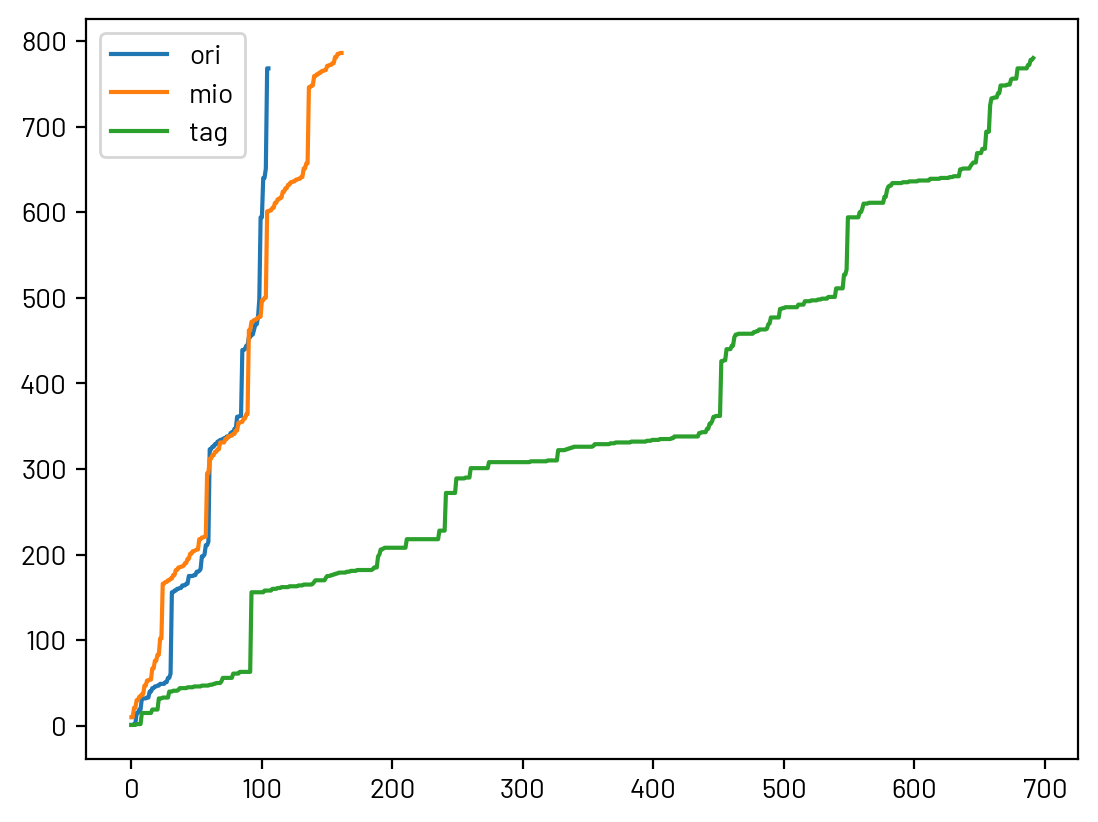

In [818]:
plt.plot(k1,label="ori")
plt.plot(k2[0],label="mio")
plt.plot(k3[0],label="tag")
plt.legend()

# SIR model

In [15]:
file_name

'High_School12'

In [16]:
import os

path = "dynamic_results/SI/"+file_name+""
R0 = path+"/R0_2picco/"
la025 = R0+"la025"
la015 = R0+"la015"
la001 = R0+"la001"
if not os.path.exists(la001):
    os.makedirs(la025)
    os.makedirs(la015)
    os.makedirs(la001)
path

'dynamic_results/SI/High_School12'

In [17]:

orig_graphs = load_origin_graph(file_name,gap)
etn_gen = load_ETNgen_graph(file_name,gap)
#tag_gen = load_tag_graph_callsms(file_name,0)
tag_gen = load_tag_graph(file_name,0)

In [18]:
print(len(orig_graphs),len(etn_gen),len(tag_gen),start)

2432 2433 2432 280


In [20]:
for lambd in [0.25,0.15,0.01]:

    mu =0.005
    K = 1

    if lambd == 0.25:
        la = la025
    if lambd == 0.15:
        la = la015
    if lambd == 0.01:
        la = la001

    print("R0 lambda",lambd,lambd)
    r_ori = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_sta = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_etn,r_stm,r_tag,r_dym = [],[],[],[]
    for etn in [etn_gen]:
        r_etn.append(ds.compute_r0(K,etn[start:],lambd,mu))
    print("Done ETN")
    for tag in [tag_gen]:
        r_tag.append(ds.compute_r0(K,tag[start:],lambd,mu))
    print("Done TAG")

    print("orig vs sta \t",ks_2samp(r_ori, r_sta)[0])
    print("orig vs etn \t",mean_ks(r_ori, r_etn))
    print("orig vs tag \t",mean_ks(r_ori, r_tag))
    
    np.save(la+"/stab",r_sta)
    np.save(la+"/orig",r_ori)
    np.save(la+"/tag",r_tag)
    np.save(la+"/etn",r_etn)
    

R0 lambda 0.25 0.25
Done ETN
Done TAG
dynamic_results/SI/High_School12/R0_2picco/la025
orig vs sta 	 1.0


NameError: name 'mean_ks' is not defined